In [1]:
import pandas as pd 
from matplotlib.pyplot import *

In [38]:
df = pd.read_csv('./data.csv')

df.drop(df.columns[:2], axis=1, inplace=True)
df.columns = ['company', 'location', 'date', 'detail', 'rocket_status', 'rocket_type', 'mission_status']
df['date'] = pd.to_datetime(df['date'], utc=True)

df.columns

Index(['company', 'location', 'date', 'detail', 'rocket_status', 'rocket_type',
       'mission_status'],
      dtype='object')

In [39]:
df['country'] = df['location'].str.split(',').apply(lambda x: x[-1])
df['rocket_active'] = df['rocket_status'].apply(lambda x: 1 if x == 'StatusActive' else 0)

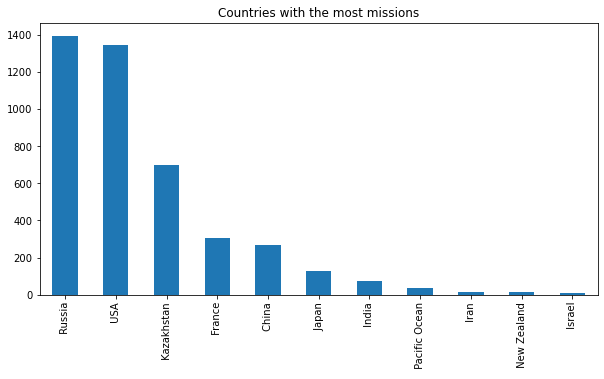

In [32]:
df.country.value_counts()[df.country.value_counts() > 10].plot(kind='bar', 
                                                               figsize=(10,5), 
                                                               title=('Countries with the most missions'));

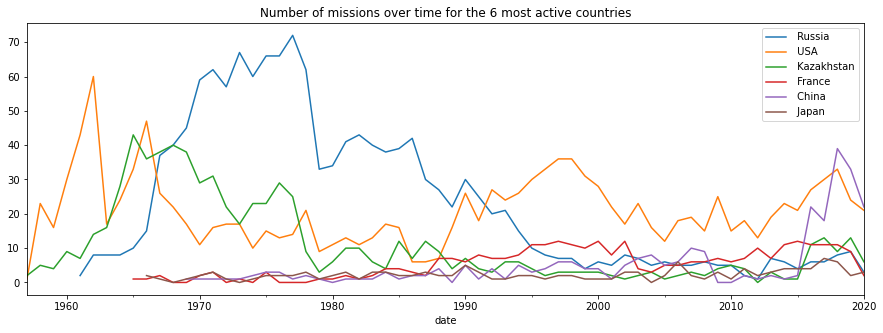

In [76]:
fig, ax = subplots()
num_countries = 6
title = 'Number of missions over time for the ' + str(num_countries) + ' most active countries'

for country in df.country.value_counts()[:num_countries].index:
    df[df['country'] == country].set_index('date').resample('1Y')['country'].count().plot(legend=True, 
                                                                                          figsize=(15,5),
                                                                                          title=title)
    
ax.legend([i for i in df.country.value_counts()[:num_countries].index]);

In [30]:
df.mission_status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: mission_status, dtype: int64

In [37]:
df[df.company == 'RVSN USSR'].country.value_counts()

 Russia        1198
 Kazakhstan     579
Name: country, dtype: int64

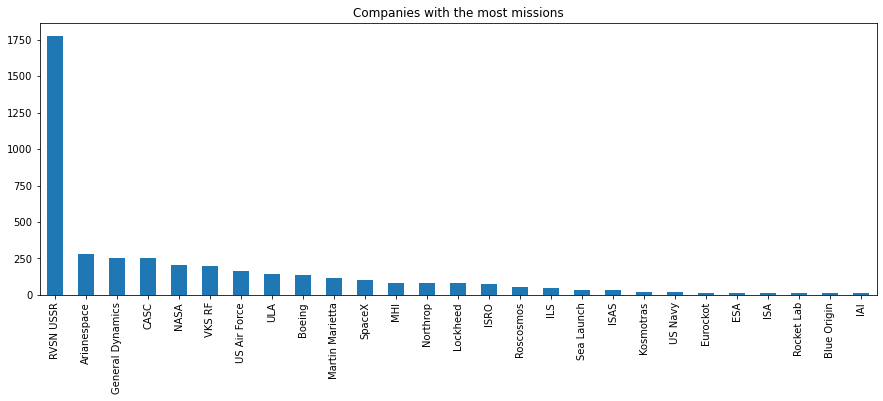

In [34]:
df['company'].value_counts()[df['company'].value_counts() > 10].plot(kind='bar', 
                                                                     figsize=(15,5),
                                                                     title=('Companies with the most missions'));

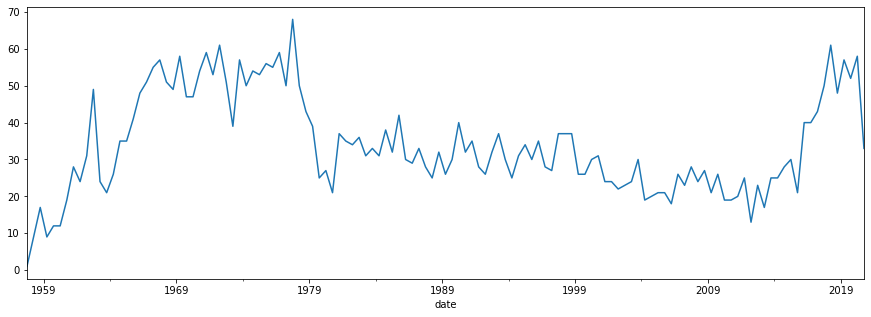

In [5]:
df.set_index('date').resample('6M')[df.columns[0]].count().plot(figsize=(15,5));